In [8]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
df_train = pd.read_csv("sign_mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205.0,206.0,206.0,207.0,207.0,206.0,206.0,204.0,205.0,204.0,203.0,202.0,142.0,151.0,160.0,172.0,196.0,188.0,188.0,190.0,135.0,96.0,86.0,77.0,77.0,79.0,176.0,205.0,207.0,207.0,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100.0,78.0,120.0,157.0,168.0,107.0,99.0,121.0,133.0,97.0,95.0,120.0,135.0,116.0,95.0,79.0,69.0,86.0,139.0,173.0,200.0,185.0,175.0,198.0,124.0,118.0,94.0,140.0,133.0,84.0,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203.0,204.0,203.0,201.0,200.0,200.0,199.0,198.0,196.0,195.0,194.0,193.0,198.0,166.0,132.0,114.0,89.0,74.0,79.0,77.0,74.0,78.0,132.0,188.0,210.0,209.0,206.0,205.0,204.0,203.0,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247.0,242.0,233.0,231.0,230.0,229.0,227.0,225.0,223.0,221.0,220.0,216.0,58.0,51.0,49.0,50.0,57.0,60.0,17.0,15.0,18.0,17.0,19.0,1.0,159.0,255.0,237.0,239.0,237.0,236.0,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90.0,77.0,88.0,117.0,123.0,127.0,129.0,134.0,145.0,152.0,156.0,179.0,105.0,106.0,105.0,104.0,104.0,104.0,175.0,199.0,178.0,152.0,136.0,130.0,136.0,150.0,118.0,92.0,85.0,76.0,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [15]:
df_test = pd.read_csv("sign_mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131.0,134.0,144.0,147.0,125.0,87.0,87.0,103.0,107.0,110.0,116.0,113.0,75.0,74.0,74.0,74.0,76.0,74.0,82.0,134.0,168.0,155.0,146.0,137.0,145.0,146.0,149.0,135.0,124.0,125.0,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114.0,112.0,89.0,48.0,133.0,194.0,182.0,185.0,184.0,184.0,182.0,181.0,172.0,174.0,177.0,178.0,178.0,179.0,181.0,183.0,187.0,175.0,165.0,154.0,118.0,107.0,100.0,75.0,96.0,83.0,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145.0,123.0,78.0,162.0,239.0,227.0,229.0,226.0,226.0,225.0,224.0,222.0,89.0,91.0,94.0,111.0,136.0,154.0,167.0,184.0,125.0,3.0,166.0,225.0,195.0,188.0,172.0,185.0,161.0,122.0,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85.0,80.0,84.0,151.0,238.0,255.0,255.0,250.0,237.0,245.0,250.0,232.0,103.0,101.0,102.0,103.0,95.0,208.0,231.0,227.0,209.0,190.0,179.0,182.0,152.0,150.0,159.0,119.0,83.0,63.0,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93.0,52.0,24.0,53.0,63.0,33.0,41.0,51.0,48.0,45.0,49.0,55.0,149.0,150.0,150.0,148.0,147.0,151.0,124.0,82.0,84.0,81.0,69.0,81.0,111.0,103.0,84.0,75.0,53.0,28.0,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [16]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,12.558140,144.933140,148.220930,150.909884,152.700581,155.691860,157.938953,160.008721,161.994186,163.523256,165.523256,167.008721,167.938953,168.453488,169.366279,169.819767,170.529070,171.098837,171.459302,171.325581,171.212209,171.084302,170.819767,170.151163,169.191860,168.113372,165.813953,164.098837,163.712209,146.755814,150.063953,152.520349,154.517442,157.619186,159.688953,161.683140,163.933140,165.575581,166.973837,169.000000,...,134.653061,136.478134,140.498542,150.067055,157.769679,163.271137,164.448980,163.186589,162.851312,163.081633,161.000000,160.069971,143.865889,144.883382,146.090379,148.005831,148.819242,147.055394,145.253644,144.058309,143.288630,138.498542,136.760933,135.775510,136.090379,136.629738,133.536443,133.276968,134.326531,136.606414,142.110787,149.183673,153.014577,159.206997,161.206997,161.271137,160.081633,160.230321,158.819242,156.454810
std,7.309253,41.486359,39.499832,38.443333,39.198313,36.559203,35.395134,34.288477,32.882687,31.858095,30.402059,29.004824,28.771428,28.893554,26.872002,26.848611,25.803909,24.983180,24.776166,24.841863,25.089316,24.885191,25.873928,26.660818,28.139974,28.818654,31.775180,32.647094,33.363993,41.645158,39.517446,38.761356,39.338847,36.410965,35.588338,34.410253,32.700847,31.870091,30.904573,28.879765,...,58.771928,59.550057,62.984816,58.746244,58.978309,57.826869,60.267747,61.898097,63.384453,62.725423,63.800447,62.864616,52.112671,51.673042,52.486038,53.053652,53.302644,53.293953,53.950674,53.604214,54.978423,54.919978,54.743805,55.473605,52.784074,55.218491,56.011572,59.353798,60.130303,62.880372,63.308762,61.927127,61.086195,61.957217,63.930388,64.303142,64.903926,63.950749,64.563374,64.724044
min,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,25.000000,10.000000,43.000000,56.000000,21.000000,44.000000,0.000000,0.000000,45.000000,50.000000,55.000000,61.000000,67.000000,71.000000,71.000000,36.000000,27.000000,29.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.000000,23.000000,7.000000,50.000000,52.000000,22.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Columns: 785 entries, label to pixel784
dtypes: float64(520), int64(265)
memory usage: 2.1 MB


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Columns: 785 entries, label to pixel784
dtypes: float64(541), int64(244)
memory usage: 8.3 MB


In [20]:
train_label = df_train["label"]
test_label = df_test["label"]

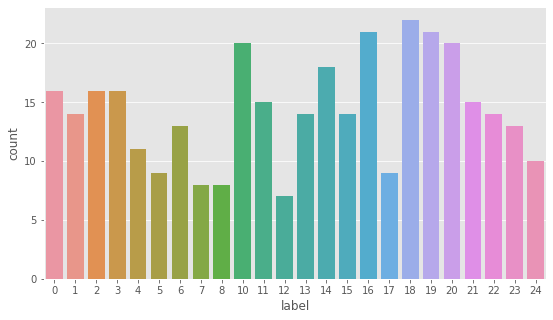

In [21]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= df_train['label'],data = df_train)
plt.show()

In [22]:
df_train.drop("label",axis=1,inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205.0,206.0,206.0,207.0,207.0,206.0,206.0,204.0,205.0,204.0,203.0,202.0,142.0,151.0,160.0,172.0,196.0,188.0,188.0,190.0,135.0,96.0,86.0,77.0,77.0,79.0,176.0,205.0,207.0,207.0,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100.0,78.0,120.0,157.0,168.0,107.0,99.0,121.0,133.0,97.0,95.0,120.0,135.0,116.0,95.0,79.0,69.0,86.0,139.0,173.0,200.0,185.0,175.0,198.0,124.0,118.0,94.0,140.0,133.0,84.0,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203.0,204.0,203.0,201.0,200.0,200.0,199.0,198.0,196.0,195.0,194.0,193.0,198.0,166.0,132.0,114.0,89.0,74.0,79.0,77.0,74.0,78.0,132.0,188.0,210.0,209.0,206.0,205.0,204.0,203.0,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247.0,242.0,233.0,231.0,230.0,229.0,227.0,225.0,223.0,221.0,220.0,216.0,58.0,51.0,49.0,50.0,57.0,60.0,17.0,15.0,18.0,17.0,19.0,1.0,159.0,255.0,237.0,239.0,237.0,236.0,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90.0,77.0,88.0,117.0,123.0,127.0,129.0,134.0,145.0,152.0,156.0,179.0,105.0,106.0,105.0,104.0,104.0,104.0,175.0,199.0,178.0,152.0,136.0,130.0,136.0,150.0,118.0,92.0,85.0,76.0,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [23]:
df_test.drop("label",axis=1,inplace=True)
df_test.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131.0,134.0,144.0,147.0,125.0,87.0,87.0,103.0,107.0,110.0,116.0,113.0,75.0,74.0,74.0,74.0,76.0,74.0,82.0,134.0,168.0,155.0,146.0,137.0,145.0,146.0,149.0,135.0,124.0,125.0,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114.0,112.0,89.0,48.0,133.0,194.0,182.0,185.0,184.0,184.0,182.0,181.0,172.0,174.0,177.0,178.0,178.0,179.0,181.0,183.0,187.0,175.0,165.0,154.0,118.0,107.0,100.0,75.0,96.0,83.0,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0


In [24]:
x_train = df_train.values
x_train

array([[107., 118., 127., ..., 204., 203., 202.],
       [155., 157., 156., ..., 103., 135., 149.],
       [187., 188., 188., ..., 195., 194., 195.],
       ...,
       [144., 147., 151., ..., 101., 102., 100.],
       [137., 141., 145., ..., 201., 200., 199.],
       [162., 167., 172., ...,  nan,  nan,  nan]])

In [55]:
x_train = x_train.reshape(-1,28,28)
x_test = df_test.values.reshape(-1,28,28)

In [38]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

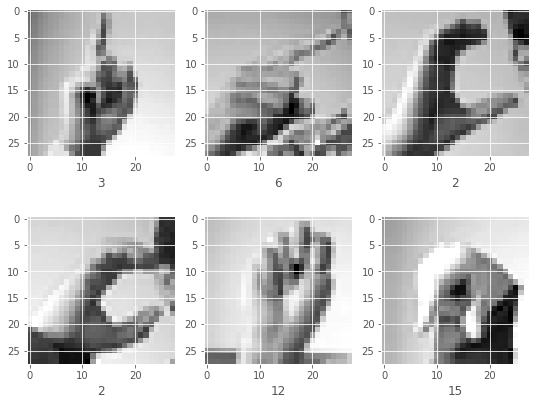

In [39]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

In [40]:
train_datagen = ImageDataGenerator(rescale=(1./255),rotation_range = 30,
                                  width_shift_range = 0.2,height_shift_range =0.2,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

In [41]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('sign_lan.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')

In [48]:
history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
                              validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
11/11 [==============================] - 3s 184ms/step - loss: nan - accuracy: 0.0436 - val_loss: nan - val_accuracy: 0.0450
Epoch 2/15
11/11 [==============================] - 2s 148ms/step - loss: nan - accuracy: 0.0465 - val_loss: nan - val_accuracy: 0.0450
Epoch 3/15
11/11 [==============================] - 2s 143ms/step - loss: nan - accuracy: 0.0465 - val_loss: nan - val_accuracy: 0.0450
Epoch 4/15
11/11 [==============================] - 1s 142ms/step - loss: nan - accuracy: 0.0465 - val_loss: nan - val_accuracy: 0.0450
Epoch 5/15
11/11 [==============================] - 2s 144ms/step - loss: nan - accuracy: 0.0465 - val_loss: nan - val_accuracy: 0.0450
Epoch 6/15
11/11 [==============================] - 1s 141ms/step - loss: nan - accuracy: 0.0465 - val_loss: nan - val_accuracy: 0.0450
Epoch 7/15
11/11 [==============================] - 2s 145ms/step - loss: nan - accuracy: 0.0465 - val_loss: nan - val_accuracy: 0.0450
Epoch 8/15
11/11 [==============================

In [49]:
import warnings
warnings.filterwarnings("ignore")
loss,acc = model.evaluate_generator(val_datagen.flow(x_test,y_test))
print(f"Accuracy: {acc*100}")
print(f"Loss: {loss}")

Accuracy: 4.496011510491371
Loss: nan


In [50]:
x_test = x_test/255.
y_pred = model.predict_classes(x_test)

In [51]:
y_te = np.argmax(y_test,axis=1)
y_te

array([ 6,  5,  9, ..., 18,  8,  5])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te,y_pred)

0.044960116026105876

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.04      1.00      0.09        62
           1       0.00      0.00      0.00        86
           2       0.00      0.00      0.00        56
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        73
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00        66
          10       0.00      0.00      0.00        35
          11       0.00      0.00      0.00        74
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00        50
          14       0.00      0.00      0.00        77
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        23
          17       0.00    

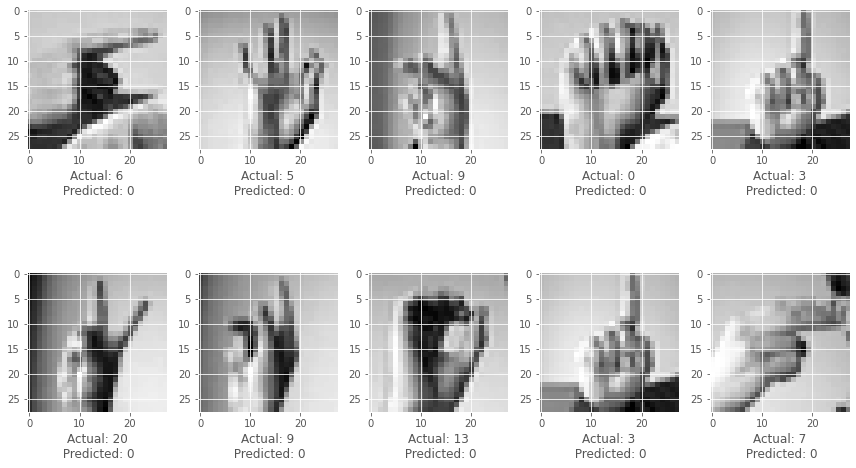

In [56]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xlabel(f"Actual: {y_te[i]}\n Predicted: {y_pred[i]}")
    
plt.tight_layout()
plt.show()